GENERATION OF 32-vec DESCRIPTOR | EXTRACTED SEQUENCES


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 287879/287879 [00:33<00:00, 8597.45it/s]


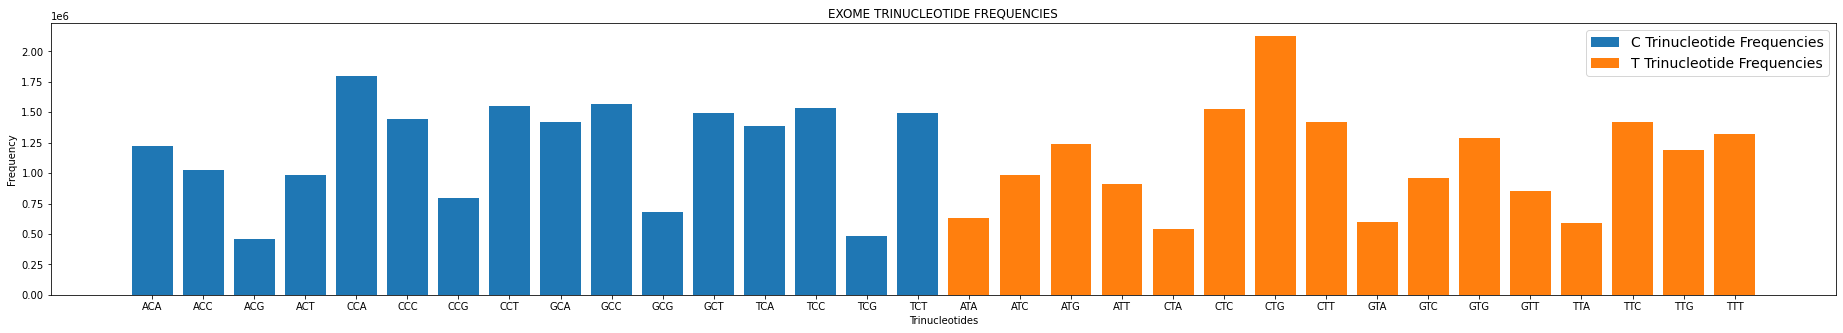

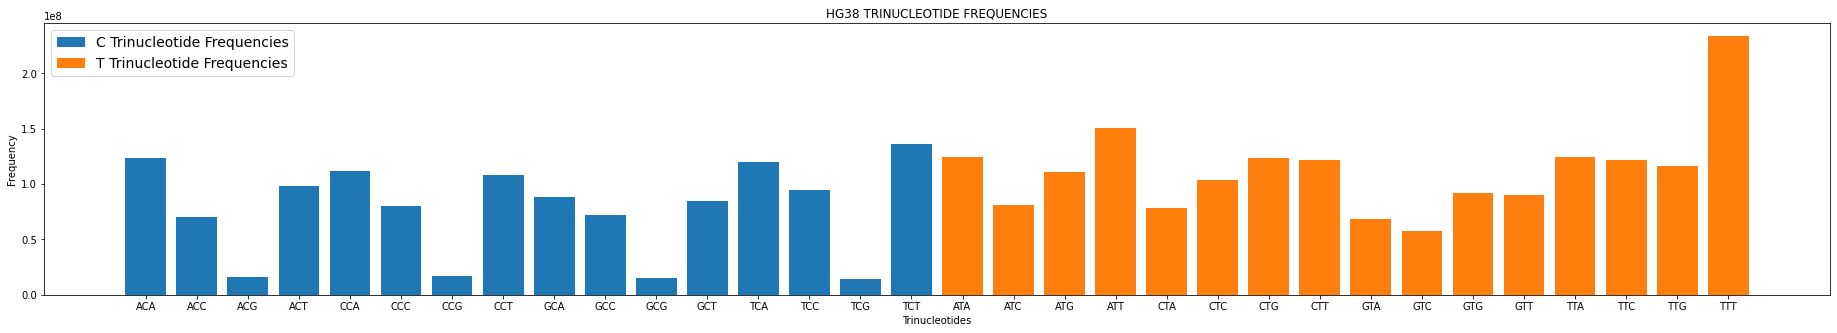

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CalcMRate2 import CalcMRate

c = CalcMRate("./bed_data/illumina_hg38_exome.bed", "./fasta_data/hg38.fa", "./extraction_dir", "extracted_exomes", np.random.rand(96))

hg38_spec32vec = np.load('hg38-32vec.npy')
trinlist, exome_spec32vec = c.get_spec32()
np.save('exome-spec32vec.npy', exome_spec32vec)
np.save('trinlist.npy', trinlist)

def plot_32vec(trinlist: list, vec32: list, gene_type: str):
    import matplotlib.pyplot as plt

    f, ax = plt.subplots(figsize=(32,5)) # set the size that you'd like (width, height)
    plt.bar(trinlist[:16], vec32[:16])
    plt.bar(trinlist[16:], vec32[16:])
    plt.title(f'{gene_type} TRINUCLEOTIDE FREQUENCIES')
    plt.xlabel('Trinucleotides')
    plt.ylabel('Frequency')
    ax.legend(["C Trinucleotide Frequencies", "T Trinucleotide Frequencies"], fontsize = 14)

plot_32vec(trinlist, exome_spec32vec, "EXOME")
plot_32vec(trinlist, hg38_spec32vec, "HG38")

In [2]:
# hg38_spec32vec = np.load('hg38-32vec.npy')
# exome_spec32vec = np.load('exome-spec32vec.npy')
# trinlist = np.load('trinlist.npy')

In [5]:
import pandas as pd

def COSMIC_sig2csv(fp: str):
    with open(fp, 'r') as f:
        lines = f.read().split('\n')
        sigmat = []
        for i in range(len(lines)):
            if len(lines[i]) > 0:
                sigmat.append(lines[i].split('\t'))
                    
    sigmat = np.array(sigmat)
    
    headers = sigmat[0, :]
    return pd.DataFrame(sigmat[1:, :], columns=headers)

# exome_96vec = np.repeat(exome_spec32vec, 3)
# hg38_96vec = np.repeat(hg38_spec32vec, 3)
elist = exome_spec32vec.tolist()
exome_96vec = np.array(elist + elist + elist)
hlist = hg38_spec32vec.tolist()
hg38_96vec = np.array(hlist + hlist + hlist)

COSMIC_exome_msigs = COSMIC_sig2csv('./COSMIC_signatures/GRCh38/COSMIC_v3.4_SBS_GRCh38_exome.txt')
COSMIC_hg38_msigs = COSMIC_sig2csv('./COSMIC_signatures/GRCh38/COSMIC_v3.4_SBS_GRCh38.txt')

COSMIC_exome_msigs

,Type,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,...,SBS90,SBS91,SBS92,SBS93,SBS94,SBS95,SBS96,SBS97,SBS98,SBS99
0,A[C>A]A,0.000296213265797173,4.68665942232019e-07,0.0162107312991617,0.0277602738111901,0.00905571583651099,0.000176551458169858,4.51241048407931e-05,0.0014561793477482,0.00498684807026163,...,0.00282630635995258,0.00167752775417823,0.00904739389430195,0.0105894403318232,0.01064262440498,0.0250586410510999,0.00949956068287186,0.00547731980259729,0.00378785813046921,3.03789077544633e-06
1,A[C>A]C,0.00111799161588394,0.00017540484461419,0.0188606199092358,0.0321283373085283,0.0104483151729504,0.000319261219302995,0.000176929768459486,0.000422564546450413,0.00174144476004836,...,0.00133344071933622,0.0442828420274001,0.0114135679525793,0.0108652614466625,0.024793168284335,0.016634505570578,0.00947172614741827,0.00739710343715706,0.00427115190809438,8.11803205916878e-06
2,A[C>A]G,0.000149253223759349,0.000106590292956506,0.00343999510185186,0.0258831093398128,0.00352122546834228,5.44538082812162e-05,0.000120946792780856,0.000293192252828214,0.0009817508359683,...,0.000448650547835604,0.000293418224310919,0.00945976294939232,0.00406316952058383,0.00271238005494175,0.0137570718402773,0.00418635441097612,0.00232756865977898,0.0357655845602249,0.000103098530960007
3,A[C>A]T,0.000434217308363022,8.01863735185752e-05,0.00964773638422145,0.0196906307636575,0.00506138433201947,7.58720758814985e-05,0.000169587424317778,0.000450239581684678,0.00205334275005184,...,0.00228620006737223,7.56167562420814e-05,0.00628628201651571,0.00781806267758598,0.00767724553242709,0.0154208260063381,0.00995825473847295,0.00467165240970675,0.00164055296516183,2.4772708052386e-05
4,A[C>G]A,0.000621847398102655,1.80193974340932e-16,0.0153534331329015,0.00453242370213945,0.00762189416239675,0.000195660466318962,4.37097672263802e-05,5.35115056788554e-06,0.00115637041739589,...,0.000652224445856603,0.000138620290237521,0.00244035125663468,0.00810392173661583,0.00478441321777392,0.00235963642875025,0.00772439951565614,0.00157552141842525,0.00296728954668516,0.000354707148926702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,T[T>C]T,0.00102922818990613,2.05670142609501e-05,0.0077020599342791,0.000297454867902575,0.00992581355982818,0.0005139069205029,0.000389067021008348,0.00131967857593602,0.0646707263438578,...,0.00365085991376318,0.000515931317622708,0.00811166465325667,0.00915960706307127,0.00814276078390134,0.00264321955657831,0.00624003207574868,0.00266919749942291,0.0026766541565656,0.00866507784814277
92,T[T>G]A,4.82629577114921e-17,8.73709606180695e-06,0.0036584111710895,0.000160571406745885,0.00255051147332715,2.82415621615979e-05,5.58522311256509e-05,0.000386435843454318,0.0129018368784006,...,0.0154456314299642,0.00219646728375016,0.00114187289639465,0.0317975780109648,0.00180091282472719,1.58830758099626e-06,0.00341334885977025,0.00102524870835522,0.00371114067273001,0.0255172736089271
93,T[T>G]C,2.12412108048806e-05,6.56057490729326e-05,0.00564459466292572,0.000132006549175806,0.00570925206650494,0.000137498384086225,9.01584273297651e-05,0.0011171837507385,0.0207186797627402,...,0.000273526018799505,9.42462282722024e-05,0.000276829779312503,0.014009418334984,0.00097329438995985,0.000317068947770023,0.00621418849887685,0.000904391072718143,0.00372465566065849,8.96977368015394e-06
94,T[T>G]G,0.000189777547942944,7.50567057143233e-05,0.0061085884568111,0.00148595245577747,0.00509925503956838,0.000131048969511141,1.46232661080387e-16,0.000821482579202402,0.00768029809659853,...,0.000365630685528438,0.000348486168087759,0.00135513365193349,0.0113189597050354,0.00202757928164393,0.000294991716287876,0.0211404355394738,0.00127357913299134,0.00589191149992886,0.000194098453036374


In [6]:
COSMIC_hg38_msigs.columns == COSMIC_exome_msigs.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [22]:
def get_rate_vectors(exome_sig, hg38_sig, COSMIC_exome_sigs: pd.DataFrame, COSMIC_hg38_sigs: pd.DataFrame):
    headers = COSMIC_exome_sigs.columns
    
    rate_vector_pairs = []
    for col in headers[1:]:
        # print(f"Calculating {col} Rate Vector")
        curr_exome_rate_vector = np.divide(np.array(COSMIC_exome_sigs[col]).astype(np.float32), exome_sig)
        curr_hg38_rate_vector = np.divide(np.array(COSMIC_hg38_sigs[col]).astype(np.float32), hg38_sig)
        
        rate_vector_pairs.append([col, curr_exome_rate_vector, curr_hg38_rate_vector])
    
    return rate_vector_pairs

def get_count_vectors(COSMIC_exome_sigs: pd.DataFrame, COSMIC_hg38_sigs: pd.DataFrame):
    headers = COSMIC_exome_sigs.columns
    
    count_vector_pairs = []
    for col in headers[1:]:
        count_vector_pairs.append([col, np.array(COSMIC_exome_sigs[col]).astype(np.float32), np.array(COSMIC_hg38_sigs[col]).astype(np.float32)])
    
    return count_vector_pairs

rate_vectors = get_rate_vectors(exome_96vec, hg38_96vec, COSMIC_exome_msigs, COSMIC_hg38_msigs)
count_vectors = get_count_vectors(COSMIC_exome_msigs, COSMIC_hg38_msigs)

In [54]:
# Iterate through the grid and create scatter plots
def plot_scatter_grid(data, rate=True):
    n = 3
    fig, axes = plt.subplots(n, n, figsize=(25, 25))

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            idx = i*n + j
            ax.scatter(data[idx][2], data[idx][1], s=3)

            if rate:
                adder = "Rate"
            else:
                adder = "Count"
                
            ax.set_xlabel(f'{data[idx][0]} - HG38 Mutation {adder} Vector')
            ax.set_ylabel(f'{data[idx][0]} - Exome Mutation {adder} Vector')
            # ax.set_title(f'{data[i+j][0]} WG vs WE Mutation Rates')
    # ax.set_title("Whole Genome vs Whole Exome Mutation Rates")
    # fig.suptitle('Whole Genome vs Whole Exome Mutation Rates', y=-1)#, fontsize=16, y=1.02)

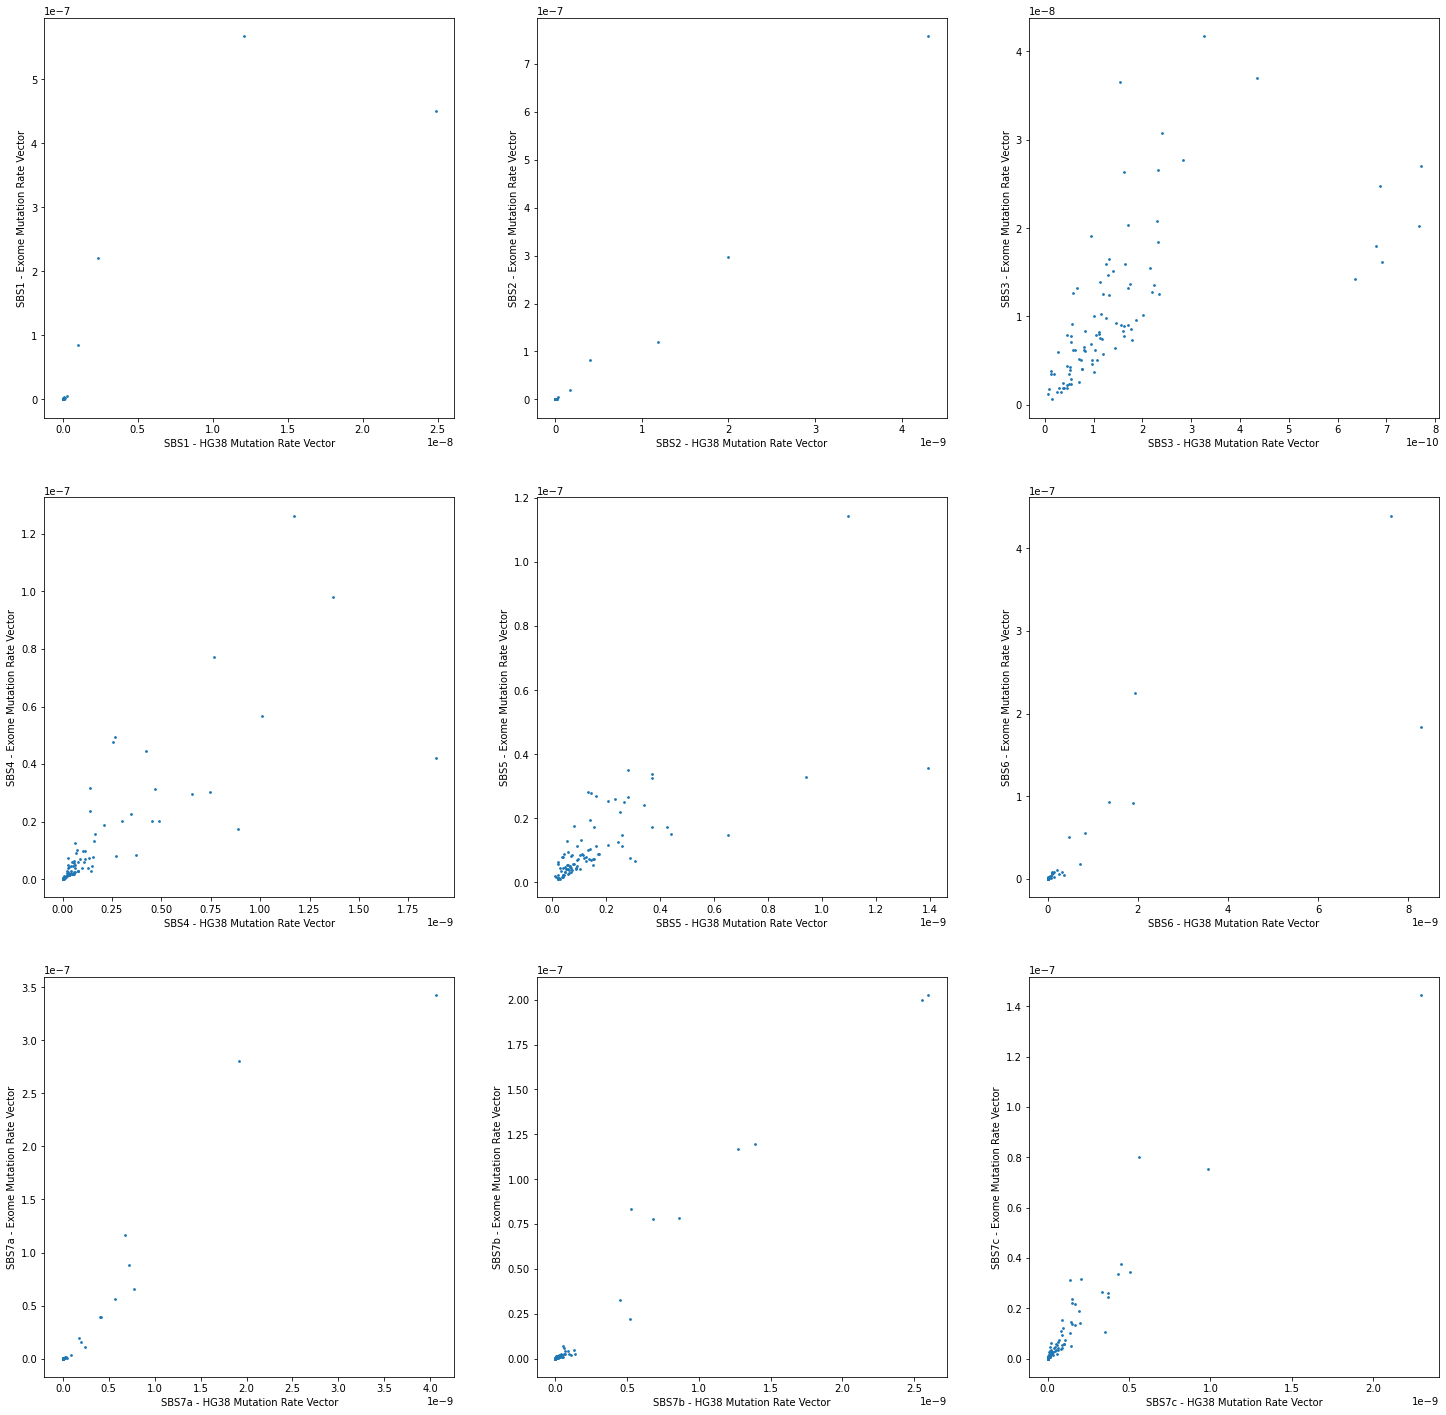

In [55]:
plot_scatter_grid(rate_vectors)

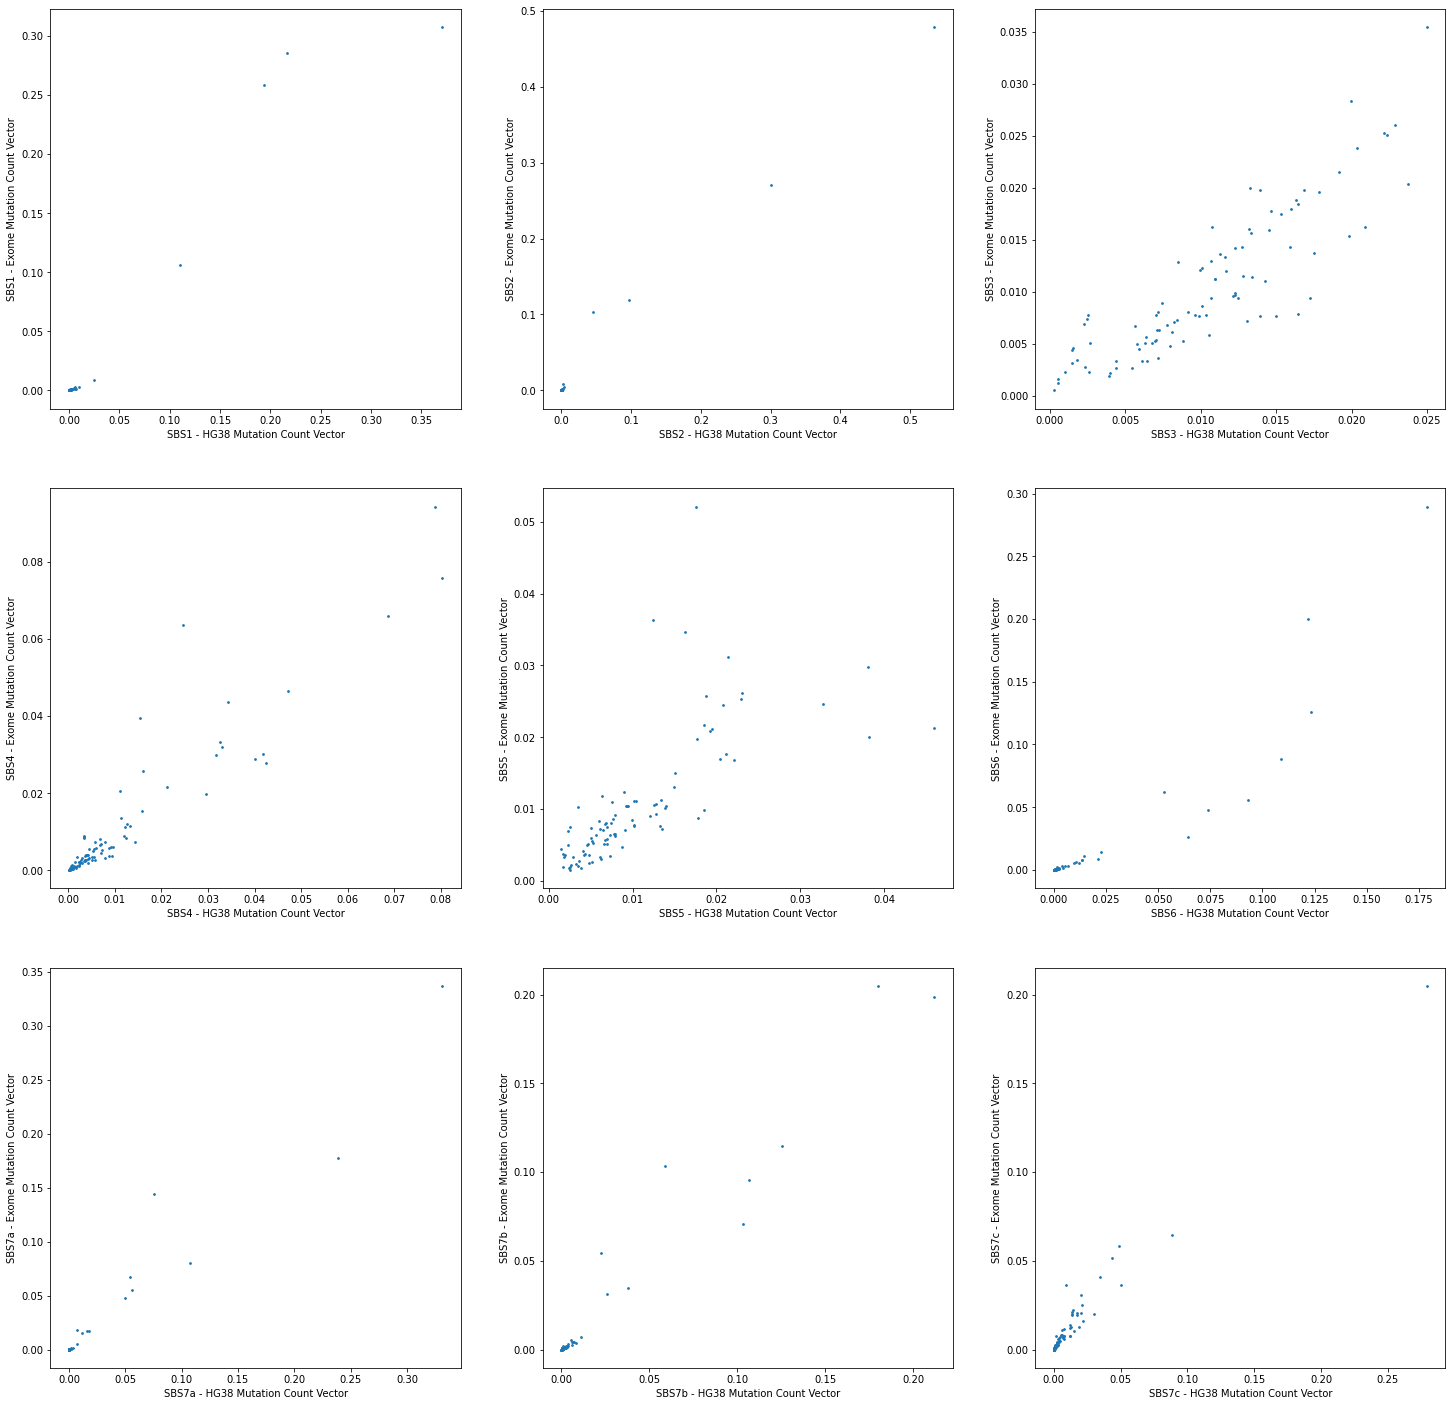

In [56]:
plot_scatter_grid(count_vectors, rate=False)

In [63]:
def get_pearson_correlation_coefficient(X, y):
    nt1 = X - (np.ones(X.shape[0]) * np.mean(X))
    nt2 = y - (np.ones(y.shape[0]) * np.mean(y))
    numer = np.sum(np.multiply(nt1, nt2))
    
    dt1 = np.multiply(nt1, nt1)
    dt2 = np.multiply(nt2, nt2)
    denom = np.sqrt(np.sum(dt1) * np.sum(dt2))
    
    return numer/denom

rate_pearson_coffs = np.array([get_pearson_correlation_coefficient(x, y) for (_, x, y) in rate_vectors])
count_pearson_coffs = np.array([get_pearson_correlation_coefficient(x, y) for (_, x, y) in count_vectors])

In [68]:
pcoff_diff = rate_pearson_coffs - count_pearson_coffs

array([-9.35112646e-02,  7.23375605e-04, -2.62146255e-01, -1.37615726e-01,
        1.67562899e-02, -5.51126020e-02, -8.22713241e-03,  9.35558634e-03,
       -2.47917288e-02, -8.46210988e-03, -2.13095348e-01, -9.90410861e-02,
       -2.80049004e-03,  9.41885446e-03, -6.72487685e-02, -7.39016758e-03,
       -2.79407407e-02, -3.46894024e-02, -4.71254997e-03, -8.85611774e-02,
       -1.75181518e-01, -3.31224920e-02, -4.74234341e-02, -9.67757785e-03,
       -1.41396379e-01, -8.59251510e-04, -6.17227664e-02, -2.78658969e-02,
        1.50186092e-02, -8.58681718e-02, -7.85296218e-03, -5.40796058e-02,
       -4.04597187e-02, -1.03741370e-03, -1.74389706e-01, -4.90097386e-02,
       -1.05883027e-01, -3.85823585e-02, -4.68524806e-02, -6.05853382e-02,
        2.79622596e-03, -5.38363935e-02, -1.98671285e-01, -1.41194518e-01,
       -4.38942479e-02,  1.42180782e-02, -1.96554017e-01, -1.32377897e-01,
       -2.72909545e-01, -1.38788228e-01,  4.00715561e-02, -3.91652344e-02,
       -1.77435510e-02, -

In [70]:
with open("Rate_Vector_PCoff.txt", "w") as f:
    for i in range(len(rate_vectors)):
        f.write(f"{rate_vectors[i][0]} {rate_pearson_coffs[i]}\n")

with open("Count_Vector_PCoff.txt", "w") as f:
    for i in range(len(count_vectors)):
        f.write(f"{count_vectors[i][0]} {count_pearson_coffs[i]}\n")